# 计算收益率

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 指定默认字体（Windows系统可以用SimHei，Mac系统可以用Arial Unicode MS）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

from scipy.stats import norm
import math
import seaborn as sns

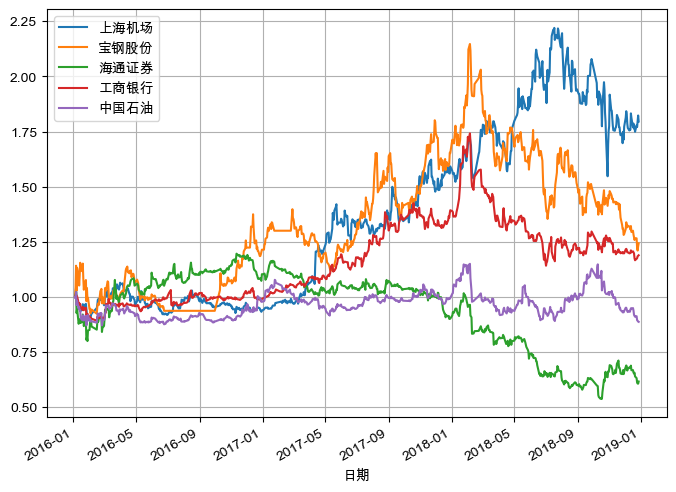

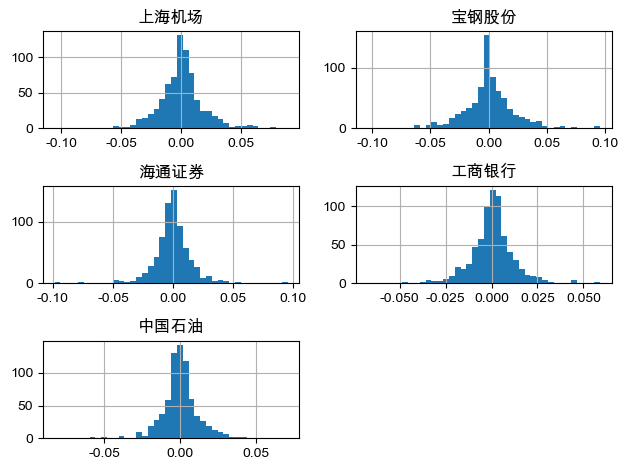

In [2]:
data = pd.read_excel(r'构建投资组合的五只股票数据.xlsx',header = 0,index_col = 0)

#归一化处理并画收盘价的走势图
(data/data.iloc[0]).plot(figsize=(8,6))
plt.legend()
plt.grid('True')

# 对数收益率走势图
R = np.log(data/data.shift(1)) #计算日对数收益率
R = R.dropna() #删除缺失值
R.describe() #日收益率情况查看

#直方图
R.hist(bins=40)
plt.tight_layout() #调整子图间距
plt.grid('True')



# 计算波动率

In [3]:
#年化收益率：日收益转化
R_mean = R.mean()*252

#计算年化协方差
R_cov = R.cov()*252
#计算相关系数
R_corr = R.corr()
#计算年化标准差
R_std = R.std()*np.sqrt(252)

#投资组合的预期年化收益
weights = np.array([0.15,0.2,0.5,0.05,0.1])
# R_port = np.sum(weights*R_mean) # 向量乘法计算
R_port = np.dot(weights,R_mean) # 数组计算
# weights.shape
# R_mean.shape
vol_port = np.sqrt(np.dot(weights,np.dot(R_cov,weights.T)))
print('投资组合的年化预期收益率：',round(R_port,4))
print('投资组合的年化收益波动率：',round(vol_port,4))
# 投资组合的年化预期收益率： -0.0394
# 投资组合的年化收益波动率： 0.2128


投资组合的年化预期收益率： -0.0394
投资组合的年化收益波动率： 0.2128
